In [1]:
import cv2
import sys
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from projeto_helper import BeerClassification

PATH = 'C:\\Users\\marco\\My Drive\\ComputerScience\\Visão Computacional\\images\\Skol'

In [2]:
bc = BeerClassification(PATH, ['0', '1', '2'])
remove_idxs = []
for i, label in enumerate(bc.labels):
    if '0.jpg' not in label:
        remove_idxs.append(i)
bc.labels = np.delete(bc.labels, remove_idxs)
bc.imgs = np.delete(bc.imgs, remove_idxs)
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v000_0.jpg
1 0_v001_0.jpg
2 0_v002_0.jpg
3 0_v003_0.jpg
4 0_v004_0.jpg
5 0_v005_0.jpg
6 0_v006_0.jpg
7 0_v007_0.jpg
8 0_v008_0.jpg
9 0_v009_0.jpg
10 0_v010_0.jpg
11 0_v011_0.jpg
12 0_v012_0.jpg
13 0_v013_0.jpg
14 0_v014_0.jpg
15 0_v015_0.jpg
16 0_v016_0.jpg
17 0_v017_0.jpg
18 0_v018_0.jpg
19 0_v019_0.jpg
20 0_v020_0.jpg
21 0_v021_0.jpg
22 0_v022_0.jpg
23 0_v023_0.jpg
24 0_v024_0.jpg
25 0_v025_0.jpg
26 0_v026_0.jpg
27 0_v027_0.jpg
28 0_v028_0.jpg
29 0_v029_0.jpg
30 0_v030_0.jpg
31 0_v031_0.jpg
32 0_v032_0.jpg
33 0_v033_0.jpg
34 0_v034_0.jpg
35 0_v035_0.jpg
36 0_v036_0.jpg
37 0_v037_0.jpg
38 0_v038_0.jpg
39 0_v039_0.jpg
40 0_v040_0.jpg
41 0_v041_0.jpg
42 0_v042_0.jpg
43 0_v043_0.jpg
44 0_v044_0.jpg
45 0_v045_0.jpg
46 0_v046_0.jpg
47 0_v047_0.jpg
48 0_v048_0.jpg
49 0_v049_0.jpg
50 0_v050_0.jpg
51 0_v051_0.jpg
52 0_v052_0.jpg
53 0_v053_0.jpg
54 0_v054_0.jpg
55 0_v055_0.jpg
56 0_v056_0.jpg
57 0_v057_0.jpg
58 0_v058_0.jpg
59 0_v059_0.jpg
60 0_v060_0.jpg
61 0_v061_0.jpg
62 0_v062_0.jpg
63

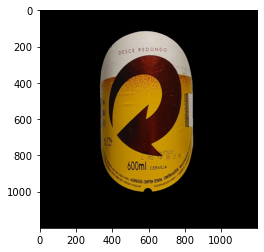

In [3]:
query_img = plt.imread(bc.imgs[0])
mask = plt.imread(join(PATH, 'mask0.jpg'))
query_img = cv2.bitwise_and(query_img, mask)

plt.figure()
plt.imshow(query_img)
plt.show()

In [ ]:
# bc.processGetDiffAllImages([query_img], [0], [mask], 'temp')

In [54]:
hist_size = [100]
ranges = [10, 110]

imgs, labels = bc._getImagesFromFolder('query_imgs')
histograms = []
for img in imgs:
    img = plt.imread(img)
    hist = []
    for i in range(3):
        h = cv2.calcHist([img], [i], None, hist_size, ranges).reshape(*hist_size)
        # h = h / np.sum(h)
        hist.append(h)
    histograms.append(hist)
histograms = np.array(histograms)
histograms.shape

(36, 3, 100)

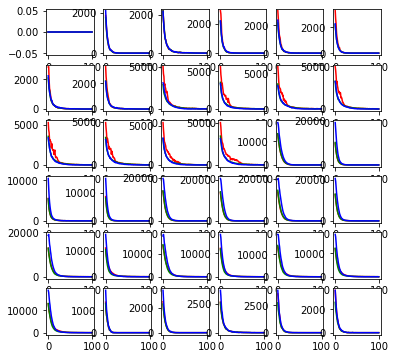

In [55]:
row = 6
col = 6
fig, axs = plt.subplots(row, col, figsize=(col, row))
for i in range(row):
    for j in range(col):
        for k, c in enumerate(['r', 'g', 'b']):
            axs[i, j].plot(histograms[i * row + j, k], color=c)
plt.show()

In [56]:
X_train = []
for h in histograms:
    X_train.append(h.flatten())
X_train = np.array(X_train)
X_train.shape

(36, 300)

In [57]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.1).fit(X_train)

In [58]:
clf.predict(X_train)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1], dtype=int64)

In [61]:
imgs, labels = bc._getImagesFromFolder('temp')
histograms = []
for img in imgs:
    img = plt.imread(img)
    hist = []
    for i in range(3):
        h = cv2.calcHist([img], [i], None, hist_size, ranges).reshape(*hist_size)
        # h = h / np.sum(h)
        hist.append(h)
    histograms.append(hist)
histograms = np.array(histograms)

X_test = []
for h in histograms:
    X_test.append(h.flatten())
X_test = np.array(X_test)
X_test.shape

(111, 300)

In [62]:
pred = clf.predict(X_test)
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1], dtype=int64)

In [63]:
s = 0
for v in pred:
    if v == -1:
        s += 1
s, s / len(pred)

(83, 0.7477477477477478)

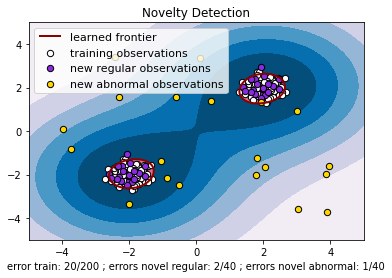

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()